# P1- Identificação de Arritmia cardíaca
Jean Carlos Mello Xavier Faria - 11259628

Primeiramente, vamos importar as bibliotecas principais para ler os arquivos, visualizá-los e trabalhar com eles.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Vamos ler os arquivos de treino fornecidos.

In [2]:
ecg_treino = pd.read_pickle("ecg_treino.pickle")
rotulos_treino = pd.read_csv("rotulos_treino.csv")
n_rotulos_treino = pd.read_csv("n_rotulos_treino.csv") 

Vamos visualizar os dados, começando com o ecg_treino.

In [3]:
ecg_treino.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,649990,649991,649992,649993,649994,649995,649996,649997,649998,649999
0,Paciente101,-0.345,-0.345,-0.345,-0.345,-0.345,-0.345,-0.345,-0.345,-0.330,...,-0.300,-0.295,-0.285,-0.280,-0.285,-0.290,-0.295,-0.295,-0.290,0.00
1,Paciente106,-0.310,-0.310,-0.310,-0.310,-0.310,-0.310,-0.310,-0.310,-0.290,...,1.970,1.900,1.785,1.690,1.550,1.355,1.040,0.635,0.265,0.00
2,Paciente108,-0.125,-0.125,-0.125,-0.125,-0.125,-0.125,-0.125,-0.125,-0.135,...,-0.135,-0.110,-0.095,-0.110,-0.155,-0.165,-0.095,-0.010,0.040,0.00
3,Paciente109,0.175,0.175,0.175,0.175,0.175,0.175,0.175,0.175,0.175,...,-0.885,-0.885,-0.885,-0.875,-0.900,-0.900,-0.910,-0.920,-0.910,-1.28
4,Paciente112,-0.750,-0.750,-0.750,-0.750,-0.750,-0.750,-0.750,-0.760,-0.770,...,-0.940,-0.925,-0.915,-0.890,-0.885,-0.845,-0.820,-0.825,-0.810,-1.28


In [4]:
ecg_treino.shape

(22, 650001)

Vemos que temos 22 pacientes, e cada um contém 650000 valores que correspondem a um valor do eletrocardiograma. Podemos plotar os dois primeiros batimentos do Paciente101, utilizando a biblioteca matplotlib.

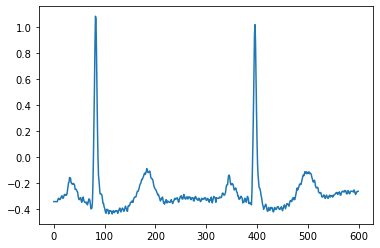

In [5]:
plt.plot(ecg_treino.iloc[0].drop('Unnamed: 0').to_numpy()[:600])

Em n_rotulos_treino temos a posição de cada pico R do eletrocardiograma. 

In [6]:
n_rotulos_treino.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,3353,3354,3355,3356,3357,3358,3359,3360,3361,3362
0,Paciente101,83,396,711,1032,1368,1712,2036,2349,2662,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Paciente106,351,724,1086,1448,1829,2197,2571,2918,3234,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Paciente108,88,442,789,1155,1493,1821,2157,2517,2889,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Paciente109,111,343,571,807,1048,1287,1523,1765,1994,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Paciente112,124,382,644,892,1149,1393,1648,1891,2147,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
n_rotulos_treino.shape

(22, 3364)

Utilizando o Paciente101, podemos plotar junto ao seus dois primeiros batimentos a posição de cada ponto R.

[(-0.5, 1.2)]

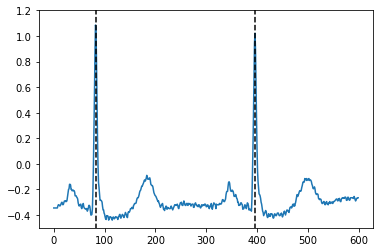

In [8]:
plt.figure()
ax = plt.subplot(1,1,1)
plt.plot(ecg_treino.iloc[0].drop('Unnamed: 0').to_numpy()[:600])
plt.plot([83, 83], [-0.8, 1.5], 'k--')
plt.plot([396, 396], [-0.8, 1.5], 'k--')
ax.set(ylim=(-0.5, 1.2))

Por fim, vamos verificar o último arquivo fornecido para o treinamento, rotulos_treino. Ele é a saída que desejamos obter com o modelo.

In [9]:
rotulos_treino.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,3353,3354,3355,3356,3357,3358,3359,3360,3361,3362
0,Paciente101,N,N,N,N,N,N,N,N,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Paciente106,N,N,N,N,N,N,N,N,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Paciente108,N,N,N,N,N,N,N,N,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Paciente109,N,N,N,N,N,N,N,N,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Paciente112,N,N,N,N,N,N,N,N,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Podemos observar apenas os batimentos N (Normais) e diversos NaN. Para podermos ter uma ideia melhor do arquivo, vamos verificar a quantidade de batimentos N, S, V e F.

In [10]:
rotulos = rotulos_treino.iloc[: , 1:].to_numpy()

N = (rotulos=='N').sum()
S = (rotulos=='S').sum()
V = (rotulos=='V').sum()
F = (rotulos=='F').sum()
print(f' N = {N} \n S = {S}\n V = {V} \n F = {F}')

 N = 45866 
 S = 944
 V = 3788 
 F = 415


# Pré-Processamento

Após termos uma ideia dos dados que estamos lidando, vamos começar o pré-processamento.

Como o objetivo é identificar apenas se há arritmia ou não em um batimento cardíaco, vamos precisar de uma medida para pegar cada batimento. Como os batimentos não tem um período definido, será necessário defní-lo. Para isso, será utilizado a diferença entre a posição do ponto R do batimento com o seu posterior. Todos os valores vão ser colocados em uma lista e depois será tirado a média.

In [11]:
pos_r = n_rotulos_treino.iloc[: , 1:].to_numpy()

num_lines = len(pos_r)
time = []
for line in range(num_lines):
    for column in range(len(pos_r[line]) - 1):
        if np.isnan(pos_r[line][column+1]) == False:
            time.append(pos_r[line][column+1] - pos_r[line][column])
        else:
            break
            
mean_rr = int(np.mean(time))
print('Média entre os pontos RR = {}'.format(mean_rr))

Média entre os pontos RR = 280


Com o resultado da média entre os pontos RR, vamos considerá-lo como o período de um batimento cardíaco. Para esse problema, será aplicado a transformada de fourier no ecg. A transformada será aplicada entre os pontos RR do ecg. Além disso, será utilizado um número inferior de ecg de cada paciente, já que muitos não tem um rótulo. Portanto, para fazer essa escolha, resolveu-se considerar que o número de batimentos de cada paciente será o mesmo número que temos de rótulos do primeiro paciente.

Para fazer isso, será criado a função **fourier_transform()** que receberá como parâmetro o ecg de todos os pacientes, a matriz com a posição dos pontos R e a média entre os pontos RR, calculada anteriormente. Ela irá retornar uma matriz com 279 colunas e em cada linha terá o módulo da transformada de fourier daquele batimento.

In [12]:
def fourier_transform(ecg,pos_r,mean_rr):
    num_batimentos = len(pos_r[:, ~pd.isna(pos_r).any(axis=0)][0])
    matriz = np.zeros((num_batimentos*len(pos_r),mean_rr-1))
    for i in range(len(pos_r)):
        for j in range(0,num_batimentos-1):
            fourier = np.fft.fft(ecg[i, int(pos_r[i,j]) : int(pos_r[i,j+1])], n = mean_rr-1) #Fourier entre dois RR
            matriz[i*num_batimentos+j] = abs(fourier)
    return matriz, num_batimentos

In [13]:
ecg = ecg_treino.iloc[: , 1:].to_numpy()

ecg_f, num_batimentos = fourier_transform(ecg, pos_r, mean_rr)

In [14]:
print(ecg_f)

[[82.01        1.28883978 11.75676269 ... 12.99927987 11.75676269
   1.28883978]
 [72.45        3.78324291 12.6736337  ... 12.24934784 12.6736337
   3.78324291]
 [83.425       4.668797   11.31439744 ... 14.28902589 11.31439744
   4.668797  ]
 ...
 [60.715      16.89820129 13.11135421 ... 17.71460897 13.11135421
  16.89820129]
 [34.93       20.02203998 13.15298713 ... 15.91599423 13.15298713
  20.02203998]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


Agora, é necessário pegar os rótulos de cada batimento que está na matriz com o módulo da transformada de fourier.

In [15]:
rotulos = rotulos[:, :num_batimentos]

Y_train = np.reshape(rotulos, (-1, 1))
print(Y_train.shape)

(35618, 1)


Vamos verificar a quantidade de rótulos **N**, **S**, **V** e **F** que temos agora com essa redução.

In [16]:
N = (Y_train=='N').sum()
S = (Y_train=='S').sum()
V = (Y_train=='V').sum()
F = (Y_train=='F').sum()
print(f' N = {N} \n S = {S}\n V = {V} \n F = {F}' )

 N = 32226 
 S = 653
 V = 2433 
 F = 303


Para facilitar a implementação da rede MLP, vamos transformar os valores em 0's e 1's se o batimento tem arrimita ou é normal, respectivamente. 

In [17]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# integer encode
label_encoder = LabelEncoder()
rotulo_inteiro = label_encoder.fit_transform(Y_train)

for i in range(len(rotulo_inteiro)):
    if rotulo_inteiro[i] != 1:
        rotulo_inteiro[i] = 0

C:\Users\jean_\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
Normal = (rotulo_inteiro==1).sum()
Arritmia = (rotulo_inteiro==0).sum()

print(f' Normal = {Normal} \n Arritmia = {Arritmia}')

 Normal = 32226 
 Arritmia = 3392


Transformando em dataframe novamente os dados de treino.

In [19]:
df_train = pd.DataFrame(ecg_f)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,269,270,271,272,273,274,275,276,277,278
0,82.010,1.288840,11.756763,12.999280,2.171648,6.635645,5.139956,2.909467,4.069527,3.731759,...,3.400929,3.731759,4.069527,2.909467,5.139956,6.635645,2.171648,12.999280,11.756763,1.288840
1,72.450,3.783243,12.673634,12.249348,2.691182,6.796311,4.959894,3.686662,4.426457,4.339760,...,4.192949,4.339760,4.426457,3.686662,4.959894,6.796311,2.691182,12.249348,12.673634,3.783243
2,83.425,4.668797,11.314397,14.289026,4.120200,8.216146,6.965842,5.127325,5.657537,4.874463,...,4.926945,4.874463,5.657537,5.127325,6.965842,8.216146,4.120200,14.289026,11.314397,4.668797
3,103.450,1.730381,12.714548,13.135865,4.099618,9.425230,7.172866,6.453905,6.424576,5.416741,...,5.516514,5.416741,6.424576,6.453905,7.172866,9.425230,4.099618,13.135865,12.714548,1.730381
4,91.710,5.312393,13.486395,10.951041,4.817143,8.968254,6.063925,6.770320,6.072804,5.648128,...,5.754961,5.648128,6.072804,6.770320,6.063925,8.968254,4.817143,10.951041,13.486395,5.312393


In [20]:
df_rotulo = pd.DataFrame(rotulo_inteiro, columns=['Rotulos'])
df_rotulo.head()

,Rotulos
0,1
1,1
2,1
3,1
4,1


Como é possível verificar anteriormente, temos um problema de dados desbalanceados, isto é, temos um grande número de batimentos normais e poucos com arritmia, dessa forma, será utilizado o SMOTE, para balancear nosso dataset.

In [21]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# define pipeline
over = SMOTE(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X, y = pipeline.fit_resample(df_train, df_rotulo)

Podemos verificar a quantidade que foi aumentada.

In [22]:
Normal = (y==1).sum()
Arritmia = (y==0).sum()

print(f' Normal = {Normal} \n Arritmia = {Arritmia}')

 Normal = Rotulos    32226
dtype: int64 
 Arritmia = Rotulos    16113
dtype: int64


Podemos ver que há um grande aumento nos rótulos com arritmia.

# Classificação

Agora vamos treinar o modelo. Primeiramente, vamos utilizar a biblioteca **sklearn** para gerar dados de teste dentro do nosso dataset de treino, para ser possível utilizar a crossvalidation, evitando overfitting.

In [23]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33, random_state=0)

Para o modelo, será considerado uma rede neural com 3 camadas, as duas primeiras com função de ativação ReLu, a primeira com 30 neurônios e a segunda com 50 neurônios e a última, a saída, a função sigmoid, ideal para problemas de classificação binária. Além disso, será considerado a inicialização de He, pois estamos utilizando ReLU. Para a função de custo será considerado a entropia cruzada binária, pois ela é mais adequada para erros de categorização e o otimizador de Adam, pois estamos tratando com muitos dados.

In [24]:
from keras.models import Sequential
from keras.layers import Dense,Conv1D
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from keras.initializers import HeUniform
from keras.layers import Dropout

initializer = HeUniform() 
model = Sequential()
model.add(Dense(30, input_shape=(mean_rr-1,), activation='relu', kernel_initializer=initializer))
model.add(Dropout(rate=0.25))
model.add(Dense(50, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(1, activation='sigmoid'))

    # Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
history = model.fit(X_train, y_train, batch_size=400, epochs=50, verbose=1, validation_data=(X_test, y_test))

Epoch 1/50
81/81 [==============================] - 1s 7ms/step - loss: 1.0959 - accuracy: 0.6911 - val_loss: 0.4772 - val_accuracy: 0.8210
Epoch 2/50
81/81 [==============================] - 0s 4ms/step - loss: 0.5008 - accuracy: 0.8017 - val_loss: 0.4219 - val_accuracy: 0.8335
Epoch 3/50
81/81 [==============================] - 0s 4ms/step - loss: 0.4457 - accuracy: 0.8206 - val_loss: 0.3866 - val_accuracy: 0.8369
Epoch 4/50
81/81 [==============================] - 0s 4ms/step - loss: 0.4140 - accuracy: 0.8289 - val_loss: 0.3599 - val_accuracy: 0.8445
Epoch 5/50
81/81 [==============================] - 0s 4ms/step - loss: 0.3877 - accuracy: 0.8393 - val_loss: 0.3309 - val_accuracy: 0.8586
Epoch 6/50
81/81 [==============================] - 0s 4ms/step - loss: 0.3644 - accuracy: 0.8549 - val_loss: 0.2983 - val_accuracy: 0.8892
Epoch 7/50
81/81 [==============================] - 0s 4ms/step - loss: 0.3466 - accuracy: 0.8641 - val_loss: 0.2877 - val_accuracy: 0.8903
Epoch 8/50
81/81 [==

Com a rede treinada, podemos plotar o gráfico da função de custo em função das épocas.

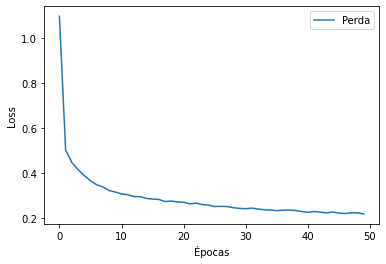

In [26]:
plt.plot(history.history['loss'], label='Perda')
plt.xlabel("Épocas")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Dados de teste

Agora com a rede treinada, vamos testar a nossa rede com os dados de teste fornecidos.

In [27]:
ecg_teste = pd.read_pickle("ecg_teste.pickle")
rotulos_teste = pd.read_csv("rotulos_teste.csv")
n_rotulos_teste = pd.read_csv("n_rotulos_teste.csv")

In [28]:
rotulos_teste.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,3241,3242,3243,3244,3245,3246,3247,3248,3249,3250
0,Paciente100,N,N,N,N,N,N,N,S,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Paciente103,N,N,N,N,N,N,N,N,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Paciente105,N,N,N,N,N,N,N,N,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Paciente111,N,N,N,N,N,N,N,N,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Paciente113,N,N,N,N,N,N,N,N,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Para os dados de teste vamos precisar realizar o mesmo procedimento realizado com os dados de treino, primeiramente, vamos utilizar a função da transformada de fourier.

In [29]:
ecg_test = ecg_teste.iloc[: , 1:].to_numpy()
pos_r_teste = n_rotulos_teste.iloc[: , 1:].to_numpy()

ecg_teste_f, num_batimentos_teste = fourier_transform(ecg_test, pos_r_teste, mean_rr)

Utilizar o mesmo número de batimentos do teste para os rótulos.

In [30]:
rotulos_test = rotulos_teste.iloc[: , 1:].to_numpy()

rotulos_test = rotulos_test[:, :num_batimentos_teste]
Y_teste = np.reshape(rotulos_test, (-1, 1))
print(Y_teste.shape)

(33396, 1)


Transformar o rótulo de teste em 0's e 1's

In [31]:
# integer encode
label_encoder = LabelEncoder()
rotulo_teste = label_encoder.fit_transform(Y_teste)

for i in range(len(rotulo_teste)):
    if rotulo_teste[i] != 1:
        rotulo_teste[i] = 0

C:\Users\jean_\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [32]:
df_teste = pd.DataFrame(ecg_teste_f)
df_teste.head()

,0,1,2,3,4,5,6,7,8,9,...,269,270,271,272,273,274,275,276,277,278
0,82.720,4.690930,4.732745,1.031115,3.874399,4.416373,4.412109,4.593898,3.304274,3.404725,...,3.021703,3.404725,3.304274,4.593898,4.412109,4.416373,3.874399,1.031115,4.732745,4.690930
1,94.030,8.871928,7.016732,0.613415,5.295921,6.217302,5.333247,6.612683,4.822674,5.384967,...,5.440030,5.384967,4.822674,6.612683,5.333247,6.217302,5.295921,0.613415,7.016732,8.871928
2,98.595,5.059089,4.078333,3.805582,5.255100,6.792027,4.309640,4.595290,4.893863,4.352387,...,5.313206,4.352387,4.893863,4.595290,4.309640,6.792027,5.255100,3.805582,4.078333,5.059089
3,92.545,4.637689,4.714341,2.643671,4.878267,6.197012,3.806297,3.908436,4.215327,3.840085,...,4.552664,3.840085,4.215327,3.908436,3.806297,6.197012,4.878267,2.643671,4.714341,4.637689
4,95.340,8.580335,3.386820,2.910972,4.562776,5.477819,2.942469,3.314020,3.565748,3.299464,...,4.023548,3.299464,3.565748,3.314020,2.942469,5.477819,4.562776,2.910972,3.386820,8.580335


In [33]:
df_rotulo_teste = pd.DataFrame(rotulo_teste, columns=['Rotulos'])
df_rotulo_teste.head()

,Rotulos
0,1
1,1
2,1
3,1
4,1


Por fim, vamos realizar a predição.

In [34]:
y_valid = (model.predict(df_teste) > 0.5)

1044/1044 [==============================] - 1s 1ms/step


Para visualizar melhor, vamos visualizar a matriz de confusão e as medidas de desempenho.

In [35]:
# from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix
matrix_confusion = confusion_matrix(rotulo_teste, y_valid)
print(matrix_confusion)
print(classification_report(rotulo_teste,y_valid))

[[ 1480  2019]
 [ 1362 28535]]
              precision    recall  f1-score   support

           0       0.52      0.42      0.47      3499
           1       0.93      0.95      0.94     29897

    accuracy                           0.90     33396
   macro avg       0.73      0.69      0.71     33396
weighted avg       0.89      0.90      0.89     33396



Como podemos verificar, a acurácia chegou a 90%, um valor bem alto, contudo, como temos a maior parte dos dados como normais, esse valor pode enganar. Uma medida importante a se notar é a precisão, vemos que o modelo é muito bom em acertar quando o batimento é normal, diferente para quando há arritmia, tendo uma precisão de 52%.

# Classificador multiclasse

## Pré-processamento

A segunda parte do projeto é fazer um classificador multiclasse. O objetivo é classificar se um batimento é da classe **N**, **S** ou **V**.

Os dados da entrada serão iguais ao classificador binário, o módulo da transformada de fourier, o que será necessário alterar serão os rótulos. 

Vamos criar uma função para transformar os rótulos de treino e de teste em uma matriz coluna que vai identificar **N=0**, **S=1** e **V=3**.

In [36]:
def rotulos_inteiro(num_batimentos, ecg, rotulos):
    
    matriz_rotulos = np.zeros((num_batimentos*len(ecg),1))

    n = 0
    for i in range(len(ecg)):
        for j in range(num_batimentos):
            if(rotulos[i,j] == 'N'):
                x = 0
            elif(rotulos[i,j] == 'S'):
                x = 1
            elif(rotulos[i,j] == 'V'):
                x = 2
            else: 
                x = 0
            matriz_rotulos[n,0] = x
            n = n+1
    return matriz_rotulos

In [37]:
rotulos_treino = rotulos_inteiro(num_batimentos, ecg, rotulos)
print(rotulos_treino.shape)

(35618, 1)


Vamos aplicar SMOTE para balancear os dados.

In [38]:
oversample = SMOTE(k_neighbors=2)
df_MC, y_MC = oversample.fit_resample(df_train, pd.DataFrame(rotulos_treino))

# Classificação

Vamos separar em dados de treino e dados de teste para o cross-validation.

In [39]:
from sklearn.model_selection import train_test_split

X_train_MC,X_test_MC,y_train_MC,y_test_MC = train_test_split(df_MC,y_MC,test_size = 0.33, random_state=0)

In [40]:
y_train_MC = pd.get_dummies(y_train_MC[0])
y_test_MC = pd.get_dummies(y_test_MC[0])

O modelo que será utilizado para esse caso vai ser uma rede MLP, igual ao anterior, contudo, terá uma camada a mais com 50 neurônios, em relação ao anterior e a função de ativação da saída será a softmax, mais adequada para o caso de multiclasse.

In [41]:
initializer = HeUniform() 
modelMC = Sequential()
modelMC.add(Dense(30, input_shape=(mean_rr-1,), activation='relu', kernel_initializer=initializer))
modelMC.add(Dropout(rate=0.25))
modelMC.add(Dense(50, activation='relu'))
modelMC.add(Dropout(rate=0.25))
modelMC.add(Dense(50, activation='relu'))
modelMC.add(Dropout(rate=0.25))
modelMC.add(Dense(3, activation='softmax'))

# Compile model
modelMC.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [42]:
historyMC = modelMC.fit(X_train_MC, y_train_MC, batch_size=400, epochs=100, validation_data=(X_test_MC, y_test_MC))

Epoch 1/100
164/164 [==============================] - 2s 7ms/step - loss: 0.6582 - accuracy: 0.5593 - val_loss: 0.4048 - val_accuracy: 0.6776
Epoch 2/100
164/164 [==============================] - 1s 5ms/step - loss: 0.4170 - accuracy: 0.6726 - val_loss: 0.3309 - val_accuracy: 0.7512
Epoch 3/100
164/164 [==============================] - 1s 5ms/step - loss: 0.3629 - accuracy: 0.7181 - val_loss: 0.3091 - val_accuracy: 0.7738
Epoch 4/100
164/164 [==============================] - 1s 5ms/step - loss: 0.3396 - accuracy: 0.7361 - val_loss: 0.2935 - val_accuracy: 0.7853
Epoch 5/100
164/164 [==============================] - 1s 5ms/step - loss: 0.3253 - accuracy: 0.7509 - val_loss: 0.2844 - val_accuracy: 0.7972
Epoch 6/100
164/164 [==============================] - 1s 5ms/step - loss: 0.3145 - accuracy: 0.7625 - val_loss: 0.2720 - val_accuracy: 0.8189
Epoch 7/100
164/164 [==============================] - 1s 5ms/step - loss: 0.3037 - accuracy: 0.7786 - val_loss: 0.2632 - val_accuracy: 0.8209

Epoch 58/100
164/164 [==============================] - 1s 5ms/step - loss: 0.1705 - accuracy: 0.8969 - val_loss: 0.1308 - val_accuracy: 0.9263
Epoch 59/100
164/164 [==============================] - 1s 5ms/step - loss: 0.1697 - accuracy: 0.8960 - val_loss: 0.1290 - val_accuracy: 0.9297
Epoch 60/100
164/164 [==============================] - 1s 5ms/step - loss: 0.1707 - accuracy: 0.8945 - val_loss: 0.1265 - val_accuracy: 0.9306
Epoch 61/100
164/164 [==============================] - 1s 5ms/step - loss: 0.1698 - accuracy: 0.8957 - val_loss: 0.1433 - val_accuracy: 0.9164
Epoch 62/100
164/164 [==============================] - 1s 5ms/step - loss: 0.1668 - accuracy: 0.8983 - val_loss: 0.1291 - val_accuracy: 0.9271
Epoch 63/100
164/164 [==============================] - 1s 6ms/step - loss: 0.1675 - accuracy: 0.8978 - val_loss: 0.1297 - val_accuracy: 0.9282
Epoch 64/100
164/164 [==============================] - 1s 5ms/step - loss: 0.1670 - accuracy: 0.9002 - val_loss: 0.1305 - val_accuracy:

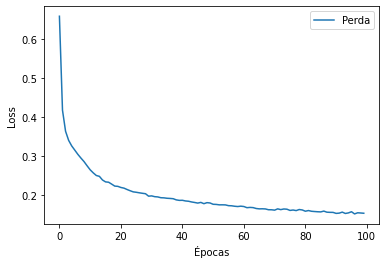

In [43]:
plt.plot(historyMC.history['loss'], label='Perda')
plt.xlabel("Épocas")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Dados de teste

Para os dados de teste, vamos aplicar a função para transformar os rótulos em inteiros e fazer a predição.

In [44]:
rotulos_teste = rotulos_inteiro(num_batimentos_teste, ecg, rotulos)

In [45]:
y_valid_MC = modelMC.predict(df_teste, verbose=1)

1044/1044 [==============================] - 1s 1ms/step


In [46]:
df_teste_MC = pd.DataFrame(np.reshape(LabelEncoder().fit_transform(np.ravel(rotulos_teste)), [-1,1]))
y_test = pd.get_dummies(df_teste_MC[0])
target_names = ['N', 'S', 'V']
y_test_MC = np.argmax(y_test.to_numpy(), axis=1)
rotulo_teste_MC = np.argmax(y_valid_MC, axis=1)
print(confusion_matrix(y_test_MC, rotulo_teste_MC))
print(classification_report(rotulo_teste_MC, y_test_MC, target_names=target_names))

[[22176  5494  2848]
 [  356   154    93]
 [ 1686   319   270]]
              precision    recall  f1-score   support

           N       0.73      0.92      0.81     24218
           S       0.26      0.03      0.05      5967
           V       0.12      0.08      0.10      3211

    accuracy                           0.68     33396
   macro avg       0.37      0.34      0.32     33396
weighted avg       0.58      0.68      0.61     33396



A acurácia do modelo ficou em 68%, mas uma das medidas mais importantes para o modelo é a precisão e vemos que a precisão das arritmias não foram tão boas, com S com 26% e V com 12%.